## Loading Data

Take the data from the crawler of your own choice and save it as a CSV. If you are finding some difficulties, you can use [this file](/consolidatedTweets.csv) to reproduce the results.


In [10]:
import pandas as pd

tweets_data = pd.read_csv("consolidatedTweets_HFLabels.csv")

tweets_data

,full_text,label
0,This week in Nature: Lonely plants – isolation...,LABEL_1
1,"Dr. Katie Bouman, who led the creation of an a...",LABEL_2
2,"Dr. Katie Bouman, who led the creation of an a...",LABEL_2
3,Japanese research no longer world class — here...,LABEL_0
4,Cutting health and science support should not ...,LABEL_1
...,...,...
1696,Here’s a tribute to an Indian village in the s...,LABEL_2
1697,#AI experts from all over the world came toget...,LABEL_2
1698,What is life really like beneath the waves? A ...,LABEL_2
1699,Samsung began the lengthy task of designing th...,LABEL_2


## Text Preprocessing



In [108]:
import re

text = "Call me Ishmael. Some years ago - never mind how long precisely - having little or no money in my purse, and nothing particular..."

punctuation_free_text = re.sub(r'[^\w\s]', '', text)

punctuation_free_text

'Call me Ishmael Some years ago  never mind how long precisely  having little or no money in my purse and nothing particular'

In [109]:
import re

text = "2:43PM: It is announced that flight EK-712 is delayed due to the..."
text = text.lower()
non_numeric_text = re.sub(r'\d+', '', text)

non_numeric_text

':pm: it is announced that flight ek- is delayed due to the...'

In [110]:
import nltk
nltk.download('punkt_tab')
from nltk import word_tokenize

tokens = word_tokenize("The quick brown fox jumps over the lazy dog.")

tokens
# 'Out','Stealing','Horses','has','been','embraced','across','the','world','as',......

[nltk_data] Downloading package punkt_tab to /Users/talha/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', '.']

In [111]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [112]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = list(filter(lambda word: word.lower() not in stop_words, tokens))

filtered_tokens
# ['Stealing', 'Horses', 'embraced', 'across', 'world', 'classic', ',', 'novel', 'universal', 'relevance', 'power', '.']

['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog', '.']

In [113]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stem = stemmer.stem("playing")    #play

stem

'play'

In [114]:
stem = stemmer.stem("happiness")    #happi

stem

'happi'

In [115]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

lemma = lemmatizer.lemmatize("happiness", pos=wordnet.NOUN)

lemma

[nltk_data] Downloading package wordnet to /Users/talha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'happiness'

## VADER

In [116]:
!pip install vaderSentiment

In [117]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

score = analyzer.polarity_scores("We regret to inform you that the request product is unavailable.")

score
#scores: {'neg': 0.219, 'neu': 0.781, 'pos': 0.0, 'compound': -0.4215}

{'neg': 0.219, 'neu': 0.781, 'pos': 0.0, 'compound': -0.4215}

In [118]:
score = analyzer.polarity_scores("It was a sunny morning of March with flowers blossoming everywhere.")

score
#scores: {'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.4215}

{'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'compound': 0.4215}

In [119]:
def get_sentiment(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.10:
        return 'positive'
    elif score['compound'] <= -0.10:
        return 'negative'
    else:
        return 'neutral'

In [120]:
tweets_data['Sentiment'] = tweets_data['full_text'].apply(get_sentiment)

tweets_data

,Unnamed: 0,full_text,created_at,favorite_count,quote_count,retweet_count,reply_count,Sentiment
0,0,This week in Nature: Lonely plants – isolation...,2024-08-22T16:50:42.000Z,95,1,16,5,negative
1,1,"Dr. Katie Bouman, who led the creation of an a...",2019-04-11T15:59:16.000Z,32470,2429,11540,450,positive
2,2,"Dr. Katie Bouman, who led the creation of an a...",2019-04-13T14:00:36.000Z,8462,412,2488,145,positive
3,3,Japanese research no longer world class — here...,2023-10-25T09:43:16.000Z,6973,1038,3642,70,negative
4,4,Cutting health and science support should not ...,2023-11-07T19:52:50.000Z,6918,486,2626,376,positive
...,...,...,...,...,...,...,...,...
1696,1696,Here’s a tribute to an Indian village in the s...,2019-12-30T08:02:28.000Z,4683,6,303,10,positive
1697,1697,#AI experts from all over the world came toget...,2020-11-10T05:30:00.000Z,4784,7,201,22,positive
1698,1698,What is life really like beneath the waves? A ...,2021-06-08T05:30:00.000Z,4673,11,279,139,positive
1699,1699,Samsung began the lengthy task of designing th...,2019-11-19T02:15:00.000Z,4596,9,268,38,neutral


## Sentiment Analysis with ML

In [11]:
from sklearn.model_selection import train_test_split
randomState = 5

X_train, X_test, y_train, y_test = train_test_split(tweets_data['full_text'], tweets_data['label'], test_size=0.2, random_state=randomState)

train_df = pd.DataFrame({'full_text': X_train, 'sentiment': y_train})
test_df = pd.DataFrame({'full_text': X_test, 'sentiment': y_test})

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

tfidf_vectorizer = TfidfVectorizer()

tfidf_features_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_features_test = tfidf_vectorizer.transform(X_test)

count_vectorizer = CountVectorizer()

cv_features_train = count_vectorizer.fit_transform(X_train)
cv_features_test = count_vectorizer.transform(X_test)

In [13]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', random_state=randomState)

In [14]:
from sklearn.metrics import accuracy_score

svm_model.fit(tfidf_features_train, y_train)

y_pred = svm_model.predict(tfidf_features_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy
#varies between 61 and 66%

0.7067448680351907

In [15]:
y_pred

array(['LABEL_2', 'LABEL_0', 'LABEL_1', 'LABEL_0', 'LABEL_2', 'LABEL_2',
       'LABEL_0', 'LABEL_1', 'LABEL_2', 'LABEL_1', 'LABEL_0', 'LABEL_1',
       'LABEL_1', 'LABEL_2', 'LABEL_1', 'LABEL_1', 'LABEL_1', 'LABEL_1',
       'LABEL_1', 'LABEL_0', 'LABEL_2', 'LABEL_1', 'LABEL_2', 'LABEL_1',
       'LABEL_2', 'LABEL_2', 'LABEL_1', 'LABEL_1', 'LABEL_2', 'LABEL_2',
       'LABEL_2', 'LABEL_1', 'LABEL_2', 'LABEL_1', 'LABEL_0', 'LABEL_1',
       'LABEL_1', 'LABEL_1', 'LABEL_2', 'LABEL_0', 'LABEL_1', 'LABEL_1',
       'LABEL_0', 'LABEL_0', 'LABEL_1', 'LABEL_1', 'LABEL_1', 'LABEL_1',
       'LABEL_1', 'LABEL_1', 'LABEL_1', 'LABEL_1', 'LABEL_1', 'LABEL_1',
       'LABEL_1', 'LABEL_0', 'LABEL_0', 'LABEL_1', 'LABEL_1', 'LABEL_1',
       'LABEL_1', 'LABEL_1', 'LABEL_1', 'LABEL_1', 'LABEL_1', 'LABEL_0',
       'LABEL_1', 'LABEL_0', 'LABEL_0', 'LABEL_2', 'LABEL_1', 'LABEL_1',
       'LABEL_0', 'LABEL_0', 'LABEL_1', 'LABEL_2', 'LABEL_1', 'LABEL_1',
       'LABEL_1', 'LABEL_1', 'LABEL_1', 'LABEL_1', 

In [16]:
y_test

824     LABEL_2
1291    LABEL_0
1066    LABEL_0
906     LABEL_0
139     LABEL_2
         ...   
973     LABEL_0
699     LABEL_1
21      LABEL_1
1167    LABEL_1
427     LABEL_1
Name: label, Length: 341, dtype: object

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=["positive", "negative", "neutral"])

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["positive", "negative", "neutral"])
disp.plot(cmap=plt.cm.Purples)
plt.title("Confusion Matrix")
plt.show()




ValueError: At least one label specified must be in y_true

In [126]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, labels=["positive", "negative", "neutral"], average='micro')

0.6158357771260997

In [127]:
a = pd.DataFrame(y_pred.flatten())

a

,0
0,positive
1,negative
2,positive
3,negative
4,positive
...,...
336,negative
337,positive
338,positive
339,positive


In [128]:
df_testing = pd.DataFrame.join(X_test,y_test)

df_testing

,full_text,Sentiment
824,#UniMelb will display transgender flags across...,positive
1291,Here’s the thing. Pepper spray can kill. Rubbe...,negative
1066,Corporate greed is killing us. Join Max Lawson...,negative
906,MSF is horrified that Al-Shifa hospital is in ...,negative
139,Team Türkiye served up this incredible moment!...,positive
...,...,...
973,Today we are in mourning after receiving confi...,negative
699,Hokusai died #onthisday in 1849. His masterpie...,positive
21,First image of a black hole revealed by the Ev...,neutral
1167,You don’t need an authoritarian state to fight...,positive


## Visualizing Results


/opt/anaconda3/envs/NLP/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


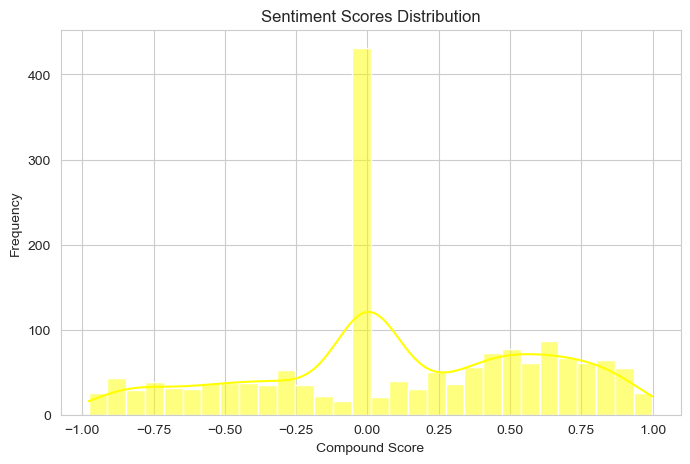

In [129]:
import matplotlib.pyplot as plt
import seaborn as sb

tweets_data['compound_sentiment_score'] = tweets_data['full_text'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

plt.figure(figsize=(8, 5))
sb.histplot(tweets_data['compound_sentiment_score'], bins=30, kde=True, color='yellow')
plt.title('Sentiment Scores Distribution')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.show()

In [130]:
!pip install wordcloud

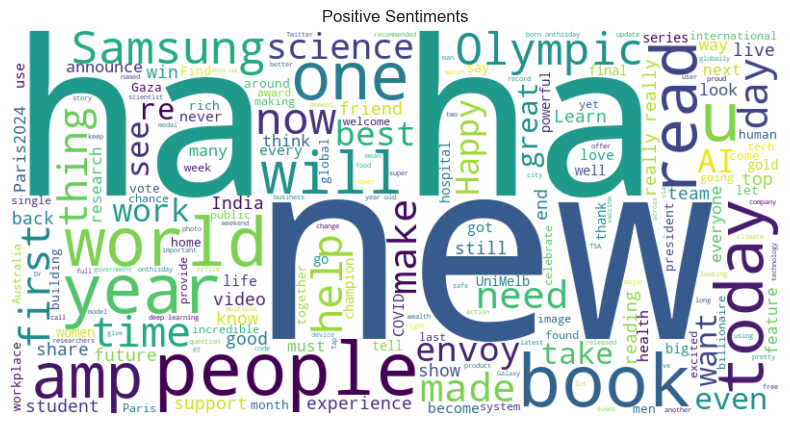

In [131]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

excluded_words = {'https', 't', 'co', 'S'}
stopwords = set(WordCloud().stopwords)
stopwords.update(excluded_words)

text_for_sentiment = tweets_data[tweets_data['Sentiment'] == 'positive']['full_text'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text_for_sentiment)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Sentiments')
plt.show()